### Задание:
На основе рассмотренного на лекции примера реализуйте следующие алгоритмы:
- SARSA
- Q-обучение
- Двойное Q-обучение <br>
для любой среды обучения с подкреплением (кроме рассмотренной на лекции среды Toy Text / Frozen Lake) из библиотеки Gym (или аналогичной библиотеки).

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import gym
from tqdm import tqdm
from IPython.display import Image

In [2]:
# ************************************ БАЗОВЫЙ АГЕНТ *****************************************

class BasicAgent:
    '''
    Базовый агент, от которого наследуются стратегии обучения
    '''

    # Наименование алгоритма
    ALGO_NAME = '---'

    def __init__(self, env, eps=0.1):
        # Среда
        self.env = env
        # Размерности Q-матрицы
        self.nA = env.action_space.n
        self.nS = env.observation_space.n
        #и сама матрица
        self.Q = np.zeros((self.nS, self.nA))
        # Значения коэффициентов
        # Порог выбора случайного действия
        self.eps=eps
        # Награды по эпизодам
        self.episodes_reward = []


    def print_q(self):
        print('Вывод Q-матрицы для алгоритма ', self.ALGO_NAME)
        print(self.Q)


    def get_state(self, state):
        '''
        Возвращает правильное начальное состояние
        '''
        if type(state) is tuple:
            # Если состояние вернулось с виде кортежа, то вернуть только номер состояния
            return state[0]
        else:
            return state 


    def greedy(self, state):
        '''
        <<Жадное>> текущее действие
        Возвращает действие, соответствующее максимальному Q-значению
        для состояния state
        '''
        return np.argmax(self.Q[state])


    def make_action(self, state):
        '''
        Выбор действия агентом
        '''
        if np.random.uniform(0,1) < self.eps:
            
            # Если вероятность меньше eps
            # то выбирается случайное действие
            return self.env.action_space.sample()
        else:
            # иначе действие, соответствующее максимальному Q-значению
            return self.greedy(state)


    def draw_episodes_reward(self):
        # Построение графика наград по эпизодам
        fig, ax = plt.subplots(figsize = (15,10))
        y = self.episodes_reward
        x = list(range(1, len(y)+1))
        plt.plot(x, y, '-', linewidth=1, color='green')
        plt.title('Награды по эпизодам')
        plt.xlabel('Номер эпизода')
        plt.ylabel('Награда')
        plt.show()


    def learn():
        '''
        Реализация алгоритма обучения
        '''
        pass

In [3]:
# ************************************ SARSA *****************************************

class SARSA_Agent(BasicAgent):
    '''
    Реализация алгоритма SARSA
    '''
    # Наименование алгоритма
    ALGO_NAME = 'SARSA'


    def __init__(self, env, eps=0.4, lr=0.1, gamma=0.98, num_episodes=20000):
        # Вызов конструктора верхнего уровня
        super().__init__(env, eps)
        # Learning rate
        self.lr=lr
        # Коэффициент дисконтирования
        self.gamma = gamma
        # Количество эпизодов
        self.num_episodes=num_episodes
        # Постепенное уменьшение eps
        self.eps_decay=0.00005
        self.eps_threshold=0.01


    def learn(self):
        '''
        Обучение на основе алгоритма SARSA
        '''
        self.episodes_reward = []
        # Цикл по эпизодам
        for ep in tqdm(list(range(self.num_episodes))):
            # Начальное состояние среды
            state = self.get_state(self.env.reset())
            # Флаг штатного завершения эпизода
            done = False
            # Флаг нештатного завершения эпизода
            truncated = False
            # Суммарная награда по эпизоду
            tot_rew = 0

            # По мере заполнения Q-матрицы уменьшаем вероятность случайного выбора действия
            if self.eps > self.eps_threshold:
                self.eps -= self.eps_decay

            # Выбор действия
            action = self.make_action(state) 

            # Проигрывание одного эпизода до финального состояния
            while not (done or truncated):
                
                # Выполняем шаг в среде
                next_state, rew, done, truncated, _ = self.env.step(action)

                # Выполняем следующее действие 
                next_action = self.make_action(next_state) 
                
                # Правило обновления Q для SARSA
                self.Q[state][action] = self.Q[state][action] + self.lr * \
                    (rew + self.gamma * self.Q[next_state][next_action] - self.Q[state][action])

                # Следующее состояние считаем текущим
                state = next_state
                action = next_action
                # Суммарная награда за эпизод
                tot_rew += rew
                if (done or truncated):
                    self.episodes_reward.append(tot_rew)

In [4]:
# ************************************ Q-обучение *****************************************

class QLearning_Agent(BasicAgent):
    '''
    Реализация алгоритма Q-Learning
    '''
    # Наименование алгоритма
    ALGO_NAME = 'Q-обучение'


    def __init__(self, env, eps=0.4, lr=0.1, gamma=0.98, num_episodes=20000):
        # Вызов конструктора верхнего уровня
        super().__init__(env, eps)
        # Learning rate
        self.lr=lr
        # Коэффициент дисконтирования
        self.gamma = gamma
        # Количество эпизодов
        self.num_episodes=num_episodes
        # Постепенное уменьшение eps
        self.eps_decay=0.00005
        self.eps_threshold=0.01


    def learn(self):
        '''
        Обучение на основе алгоритма Q-Learning
        '''
        self.episodes_reward = []
        # Цикл по эпизодам
        for ep in tqdm(list(range(self.num_episodes))):
            # Начальное состояние среды
            state = self.get_state(self.env.reset())
            # Флаг штатного завершения эпизода
            done = False
            # Флаг нештатного завершения эпизода
            truncated = False
            # Суммарная награда по эпизоду
            tot_rew = 0

            # По мере заполнения Q-матрицы уменьшаем вероятность случайного выбора действия
            if self.eps > self.eps_threshold:
                self.eps -= self.eps_decay

            # Проигрывание одного эпизода до финального состояния
            while not (done or truncated):

                # Выбор действия
                # В SARSA следующее действие выбиралось после шага в среде 
                action = self.make_action(state) 
                
                # Выполняем шаг в среде
                next_state, rew, done, truncated, _ = self.env.step(action)

                # Правило обновления Q для SARSA (для сравнения)
                # self.Q[state][action] = self.Q[state][action] + self.lr * \
                #     (rew + self.gamma * self.Q[next_state][next_action] - self.Q[state][action])

                # Правило обновления для Q-обучения
                self.Q[state][action] = self.Q[state][action] + self.lr * \
                    (rew + self.gamma * np.max(self.Q[next_state]) - self.Q[state][action])

                # Следующее состояние считаем текущим
                state = next_state
                # Суммарная награда за эпизод
                tot_rew += rew
                if (done or truncated):
                    self.episodes_reward.append(tot_rew)

In [5]:
# ************************************ Двойное Q-обучение *****************************************

class DoubleQLearning_Agent(BasicAgent):
    '''
    Реализация алгоритма Double Q-Learning
    '''
    # Наименование алгоритма
    ALGO_NAME = 'Двойное Q-обучение'


    def __init__(self, env, eps=0.4, lr=0.1, gamma=0.98, num_episodes=20000):
        # Вызов конструктора верхнего уровня
        super().__init__(env, eps)
        # Вторая матрица
        self.Q2 = np.zeros((self.nS, self.nA))
        # Learning rate
        self.lr=lr
        # Коэффициент дисконтирования
        self.gamma = gamma
        # Количество эпизодов
        self.num_episodes=num_episodes
        # Постепенное уменьшение eps
        self.eps_decay=0.00005
        self.eps_threshold=0.01


    def greedy(self, state):
        '''
        <<Жадное>> текущее действие
        Возвращает действие, соответствующее максимальному Q-значению
        для состояния state
        '''
        temp_q = self.Q[state] + self.Q2[state]
        return np.argmax(temp_q)


    def print_q(self):
        print('Вывод Q-матриц для алгоритма ', self.ALGO_NAME)
        print('Q1')
        print(self.Q)
        print('Q2')
        print(self.Q2)


    def learn(self):
        '''
        Обучение на основе алгоритма Double Q-Learning
        '''
        self.episodes_reward = []
        # Цикл по эпизодам
        for ep in tqdm(list(range(self.num_episodes))):
            # Начальное состояние среды
            state = self.get_state(self.env.reset())
            # Флаг штатного завершения эпизода
            done = False
            # Флаг нештатного завершения эпизода
            truncated = False
            # Суммарная награда по эпизоду
            tot_rew = 0

            # По мере заполнения Q-матрицы уменьшаем вероятность случайного выбора действия
            if self.eps > self.eps_threshold:
                self.eps -= self.eps_decay

            # Проигрывание одного эпизода до финального состояния
            while not (done or truncated):

                # Выбор действия
                # В SARSA следующее действие выбиралось после шага в среде 
                action = self.make_action(state) 
                
                # Выполняем шаг в среде
                next_state, rew, done, truncated, _ = self.env.step(action)

                if np.random.rand() < 0.5:
                    # Обновление первой таблицы
                    self.Q[state][action] = self.Q[state][action] + self.lr * \
                        (rew + self.gamma * self.Q2[next_state][np.argmax(self.Q[next_state])] - self.Q[state][action])
                else:
                    # Обновление второй таблицы
                    self.Q2[state][action] = self.Q2[state][action] + self.lr * \
                        (rew + self.gamma * self.Q[next_state][np.argmax(self.Q2[next_state])] - self.Q2[state][action])

                # Следующее состояние считаем текущим
                state = next_state
                # Суммарная награда за эпизод
                tot_rew += rew
                if (done or truncated):
                    self.episodes_reward.append(tot_rew)

In [6]:
def play_agent(agent):
    '''
    Проигрывание сессии для обученного агента
    '''
    env2 = gym.make('CliffWalking-v0', render_mode='human')
    state = env2.reset()[0]
    done = False
    while not done:
        action = agent.greedy(state)
        next_state, reward, terminated, truncated, _ = env2.step(action)
        env2.render()
        state = next_state
        if terminated or truncated:
            done = True

In [7]:
def run_sarsa():
    env = gym.make('CliffWalking-v0')
    agent = SARSA_Agent(env)
    agent.learn()
    agent.print_q()
    agent.draw_episodes_reward()
    play_agent(agent)


def run_q_learning():
    env = gym.make('CliffWalking-v0')
    agent = QLearning_Agent(env)
    agent.learn()
    agent.print_q()
    agent.draw_episodes_reward()
    play_agent(agent)


def run_double_q_learning():
    env = gym.make('CliffWalking-v0')
    agent = DoubleQLearning_Agent(env)
    agent.learn()
    agent.print_q()
    agent.draw_episodes_reward()
    play_agent(agent)

In [8]:
def main():
    run_sarsa()
    # run_q_learning()
    # run_double_q_learning()

  0%|                                                                                                                                       | 0/20000 [00:00<?, ?it/s]/Users/evseykirichkov/anaconda3/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:02<00:00, 8034.58it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[ -13.26294986  -12.43380867  -14.10135097  -13.21000484]
 [ -12.52579552  -11.66647166  -13.53106331  -13.40898279]
 [ -11.70790196  -10.88239767  -12.89532968  -12.69356167]
 [ -10.9235203   -10.08531634  -11.95482232  -11.90033677]
 [ -10.09408412   -9.27114211  -10.98673716  -11.10145279]
 [  -9.23878335   -8.42424874  -10.42059298  -10.26690991]
 [  -8.40343466   -7.52636      -9.28899855   -9.45953289]
 [  -7.52984409   -6.60107648   -8.43573291   -8.59485803]
 [  -6.7035604    -5.72417571   -7.5735084    -7.73000048]
 [  -5.78771995   -4.82468695   -5.23114877   -6.9017995 ]
 [  -4.84392395   -3.88160232   -4.27976826   -5.95578256]
 [  -3.92183134   -3.93001026   -2.9404       -5.11503908]
 [ -13.21436472  -14.7315099   -14.95288683  -14.06499432]
 [ -12.41605499  -17.35694729  -28.3932702   -16.99770461]
 [ -11.69192293  -17.92362993  -24.701369    -20.37565234]
 [ -10.97915917  -16.29167505  -21.96251843  -18.28970516]
 [ -10.06897221  -1

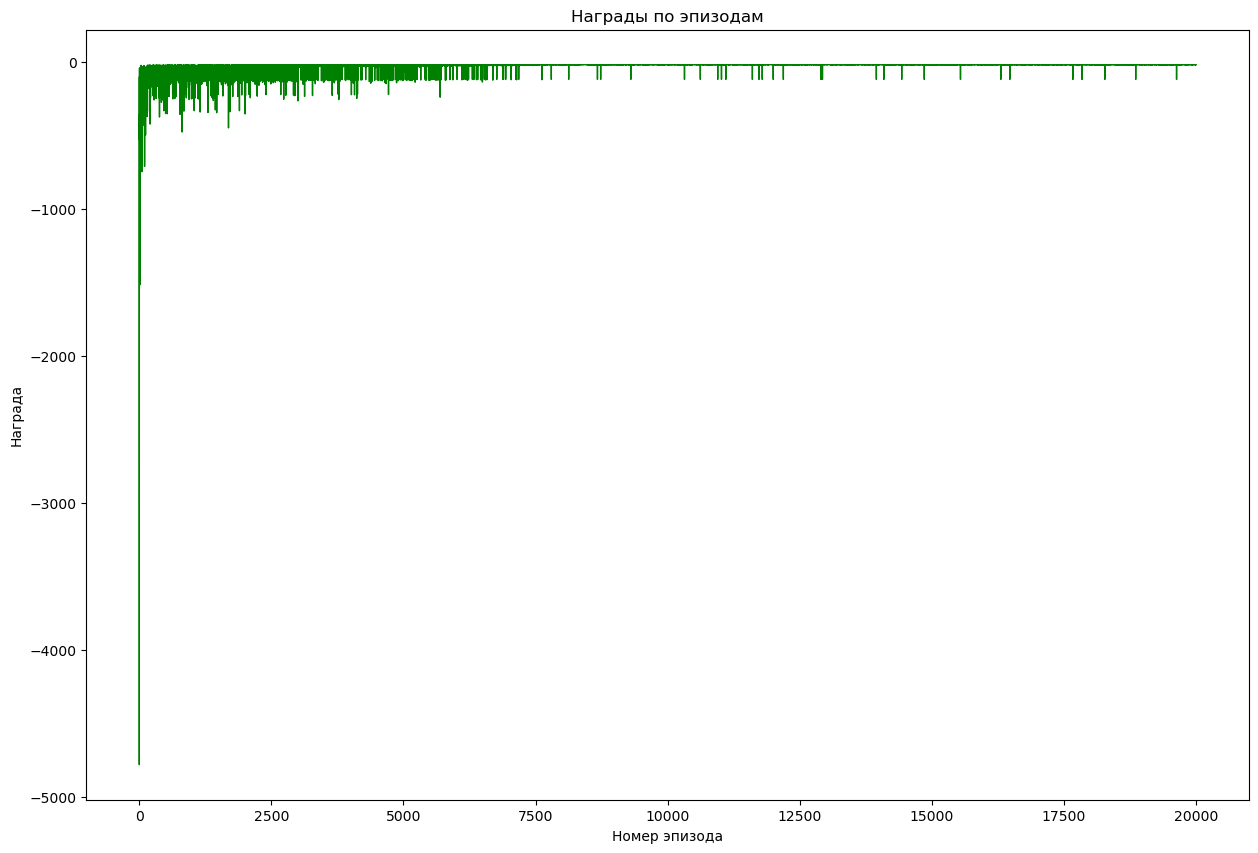

In [9]:
if __name__ == '__main__':
    main()

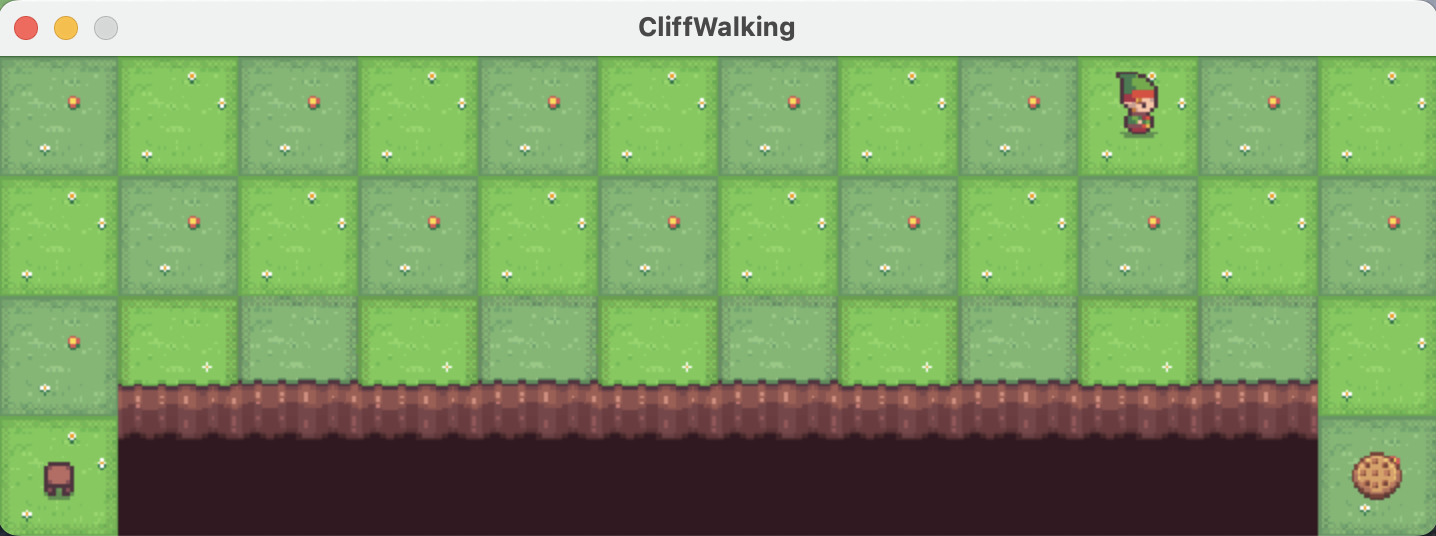

In [10]:
image_path_1 = "data/sarsa_result.png"
display(Image(filename=image_path_1, width=600, height=600))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:02<00:00, 6967.88it/s]


Вывод Q-матрицы для алгоритма  Q-обучение
[[ -12.44200983  -12.30195442  -12.30060536  -12.57436368]
 [ -12.1770678   -11.54786952  -11.54777733  -12.7632722 ]
 [ -11.43372315  -10.76413343  -10.7641349   -11.97663796]
 [ -10.63294576   -9.96343013   -9.96343014  -11.41912102]
 [  -9.86555625   -9.14635939   -9.14635941  -10.6736519 ]
 [  -9.12558217   -8.31261185   -8.31261185   -9.93319577]
 [  -8.29936287   -7.46184886   -7.46184886   -9.12878193]
 [  -7.44898056   -6.59372333   -6.59372333   -8.30311416]
 [  -6.58163956   -5.70788096   -5.70788096   -7.43951799]
 [  -5.68341635   -4.80396016   -4.80396016   -6.56919695]
 [  -4.76357223   -3.881592     -3.881592     -5.67485053]
 [  -3.82718789   -3.84097923   -2.9404       -4.76090262]
 [ -13.0345378   -11.54888054  -11.54888054  -12.31767311]
 [ -12.31485187  -10.76416381  -10.76416381  -12.31789813]
 [ -11.548783     -9.96343246   -9.96343246  -11.54888049]
 [ -10.764156     -9.14635966   -9.14635966  -10.76416379]
 [  -9.9634312

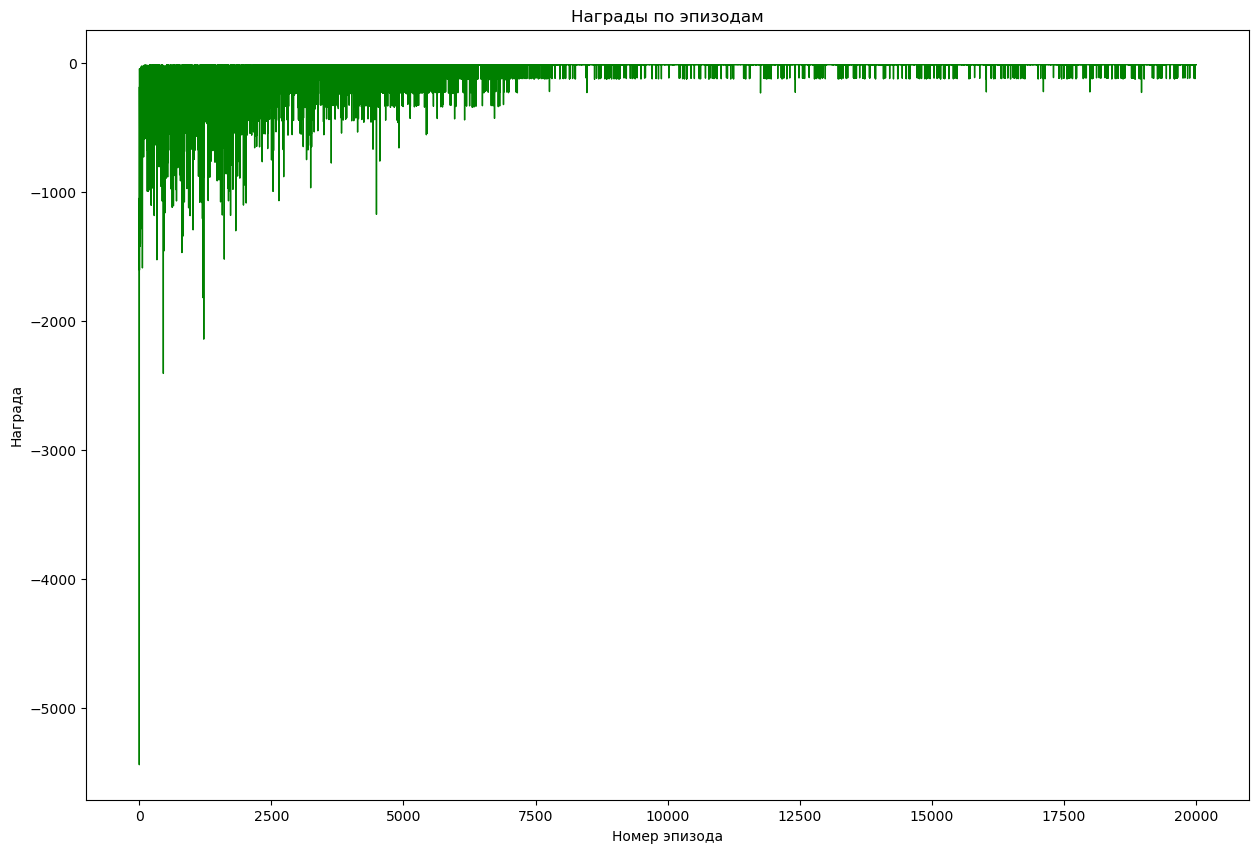

In [11]:
run_q_learning()

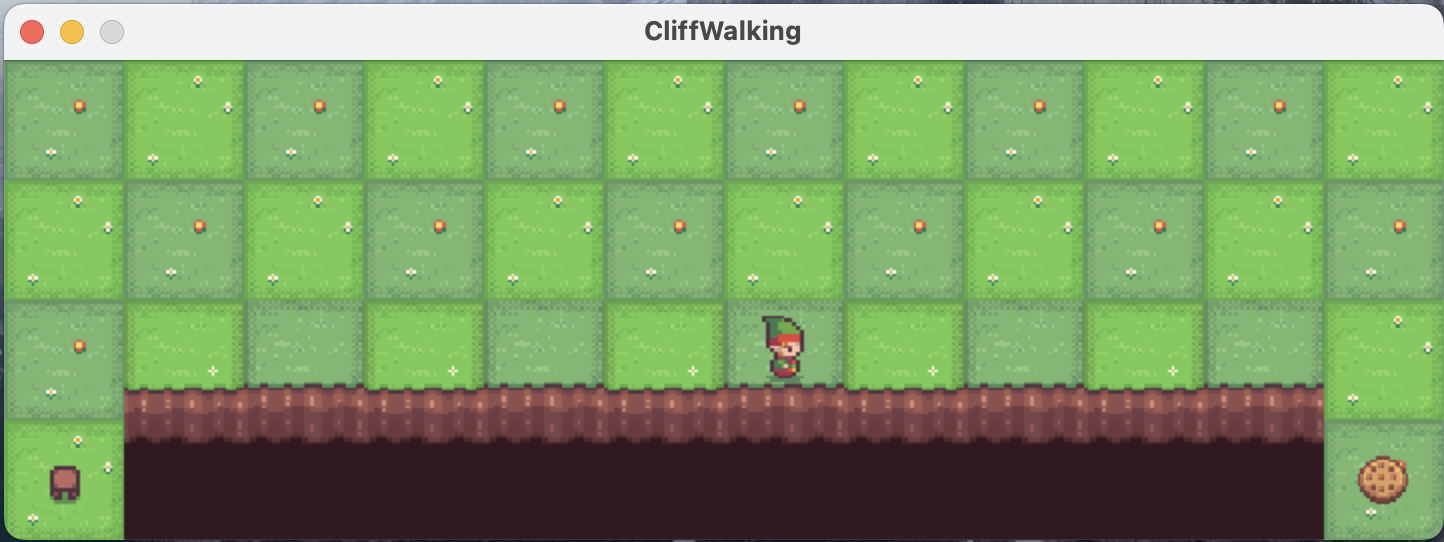

In [12]:
image_path_2 = "data/q_learning_result.png"
display(Image(filename=image_path_2, width=600, height=600))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:02<00:00, 6837.80it/s]


Вывод Q-матриц для алгоритма  Двойное Q-обучение
Q1
[[ -13.03130013  -12.50866948  -12.320418    -12.82388789]
 [ -12.21963171  -11.55640473  -12.17107459  -12.62537939]
 [ -11.48735219  -10.96083847  -10.76418501  -12.24798635]
 [ -10.86448601   -9.96349207  -10.36686309  -11.3877139 ]
 [  -9.96234278   -9.2974102    -9.14635966  -10.72426541]
 [  -9.11851845   -8.86524222   -8.31261585   -9.87851451]
 [  -8.5456789    -7.46176795   -7.45389159   -8.93434584]
 [  -7.39509406   -6.81182658   -6.59372339   -8.71390475]
 [  -6.51053616   -5.66544547   -5.67809948   -6.16329683]
 [  -4.98536139   -4.94603643   -4.80464486   -5.90011319]
 [  -4.34650801   -3.83006708   -3.88171589   -4.92430371]
 [  -3.24928847   -3.63736056   -2.94543735   -3.80778742]
 [ -13.10244515  -11.57150818  -11.54888054  -12.3217196 ]
 [ -12.38718457  -10.76416381  -10.772436    -12.32848755]
 [ -11.55004286   -9.96343246   -9.96483401  -11.54914474]
 [ -10.76429031   -9.14635966   -9.14686419  -10.76427298]
 [  

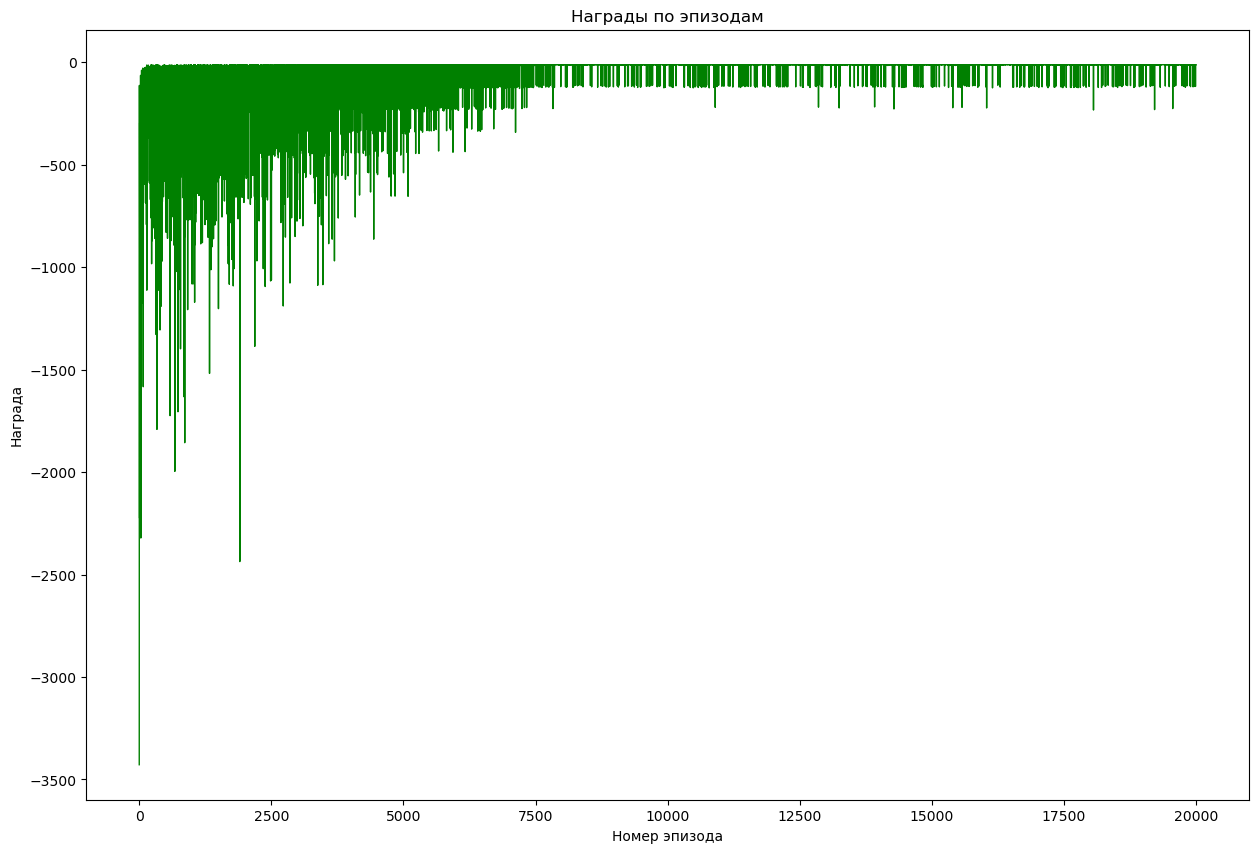

In [13]:
run_double_q_learning()

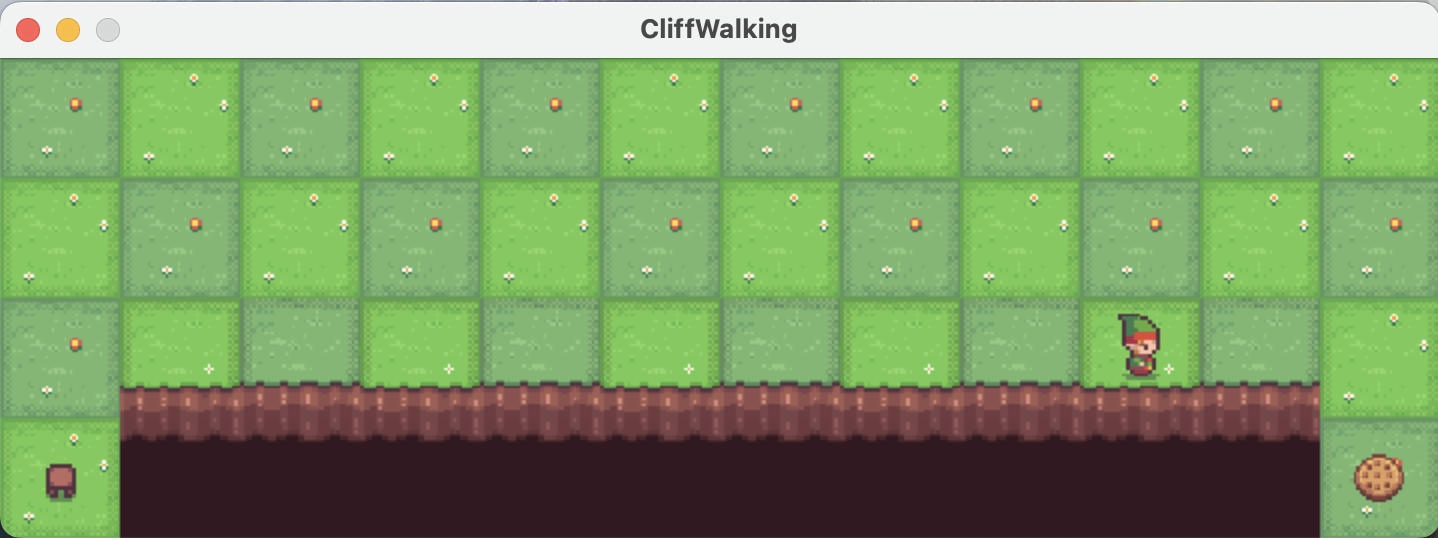

In [14]:
image_path_3 = "data/double_q_learning_result.png"
display(Image(filename=image_path_3, width=600, height=600))

### Итог
SARSA учится, основываясь на том, что агент действительно делает, включая случайные действия. Это делает путь агента более осторожным и безопасным, потому что алгоритм учитывает риск этих случайных действий. Q-learning учится на основе лучшего возможного действия в каждой ситуации, не учитывая случайные действия. Это делает путь агента более прямым и рискованным, потому что он всегда стремится к максимальной награде, даже если это может быть опасно. Double Q-learning направлен на устранение смещения переоценки в Q-learning, поддерживая два отдельных Q-значения и обновляя их поочередно. Это обычно приводит к более сбалансированному и стабильному процессу обучения. Путь, выбранный агентом с использованием Double Q-learning, обычно является компромиссом между осторожным подходом SARSA и агрессивным подходом Q-learning, что приводит к более надежной политике.